# We developed this in VS Code, copied the code here

In [ ]:
import torchvision
import torch

In [2]:
# Reference 1 — PyTorch 1.7.0 documentation. 2020.
# torchvision.datasets — PyTorch 1.7.0 documentation.
# [ONLINE] Available at: https://pytorch.org/docs/stable/torchvision/datasets.html#mnist.
# [Accessed 17 December 2020].

# Reference 2 - aiworkbox.com. 2020.
# PyTorch MNIST: Load MNIST Dataset from PyTorch Torchvision · PyTorch Tutorial .
# [ONLINE] Available at: https://www.aiworkbox.com/lessons/load-mnist-dataset-from-pytorch-torchvision.
# [Accessed 17 December 2020].


def load_dataset(batch_size_train, batch_size_test):
    train_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('./task3data', train=True, download=True,
                                   transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor()
                                   ])),
        batch_size=batch_size_train, shuffle=True)

    test_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('./task3data', train=False, download=True,
                                   transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor()
                                   ])),
        batch_size=batch_size_test, shuffle=True)

    return train_loader, test_loader

# CNN

Extracting ./task3data/MNIST/raw/train-images-idx3-ubyte.gz to ./task3data/MNIST/raw


Extracting ./task3data/MNIST/raw/train-labels-idx1-ubyte.gz to ./task3data/MNIST/raw




Extracting ./task3data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./task3data/MNIST/raw


Extracting ./task3data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./task3data/MNIST/raw
Processing...
Done!



/Users/razvangututui/opt/anaconda3/envs/py379/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1603729051302/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/Users/razvangututui/opt/anaconda3/envs/py379/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/Users/razvangututui/opt/anaconda3/envs/py379/lib/python3.7/site-packages/torch/nn/

Epoch 1 finished

Test set: Avg. loss: 0.1203, Accuracy: 9638/10000 (96%)

Epoch 2 finished

Test set: Avg. loss: 0.0853, Accuracy: 9722/10000 (97%)


Epoch 3 finished

Test set: Avg. loss: 0.0649, Accuracy: 9795/10000 (98%)

Epoch 4 finished

Test set: Avg. loss: 0.0518, Accuracy: 9824/10000 (98%)

Epoch 5 finished

Test set: Avg. loss: 0.0471, Accuracy: 9854/10000 (99%)

Epoch 6 finished

Test set: Avg. loss: 0.0424, Accuracy: 9868/10000 (99%)

Epoch 7 finished

Test set: Avg. loss: 0.0384, Accuracy: 9878/10000 (99%)

Epoch 8 finished

Test set: Avg. loss: 0.0361, Accuracy: 9891/10000 (99%)

Epoch 9 finished

Test set: Avg. loss: 0.0339, Accuracy: 9890/10000 (99%)

Epoch 10 finished

Test set: Avg. loss: 0.0324, Accuracy: 9895/10000 (99%)

Epoch 11 finished

Test set: Avg. loss: 0.0380, Accuracy: 9884/10000 (99%)

Epoch 12 finished

Test set: Avg. loss: 0.0325, Accuracy: 9893/10000 (99%)



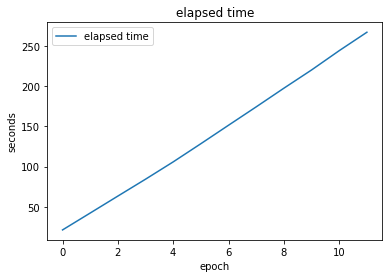

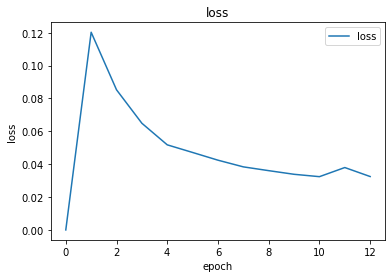

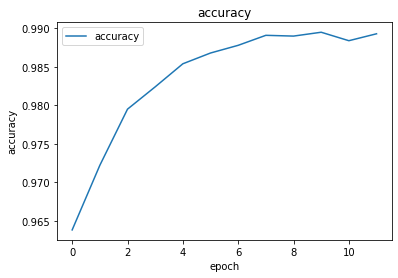

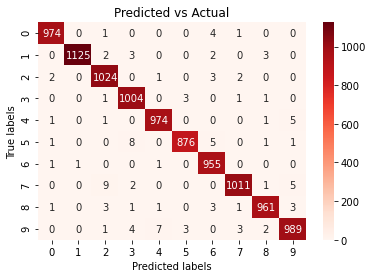

In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

# Hyper params
epochs = 12
train_batch_size = 30
test_batch_size = 1000
l_r = 0.0005
momentum = 0.5
# Retrieve the data
train_data, test_data = load_dataset(train_batch_size, test_batch_size)


# References for the main idea of building the __init__/forward functions:
# Training a Classifier — PyTorch Tutorials 1.7.1 documentation. 2020.
# [ONLINE] Available at: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html.
# [Accessed 17 December 2020].
# MNIST Handwritten Digit Recognition in PyTorch - Nextjournal. 2020.
# [ONLINE] Available at: https://nextjournal.com/gkoehler/pytorch-mnist
# [Accessed 17 December 2020].
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Set up the structure of layers for the network
        # Takes 1-channel images
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.conv2_drop = nn.Dropout2d()
        self.layer1 = nn.Linear(320, 60)
        self.layer2 = nn.Linear(60, 10)

    def forward(self, x):
        # Call the activation functions of each layer in order
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        # x = self.pool(F.relu(self.conv2(x)))
        # Resizes/ Flattens the input data
        # to be usable in the first activation function
        x = x.view(-1, 320)
        x = F.relu(self.layer1(x))
        # x = F.dropout(x, training=self.training)
        x = self.layer2(x)
        return F.log_softmax(x)


# Initialize the network and apply the SGD optimizeer
network = CNN()
optimizer = optim.Adam(network.parameters(),
                      lr=l_r) # , momentum=momentum


def train():
    # Selects the network mode to 'train'
    network.train()
    # Iterate through each mini_batch
    for data, target in train_data:
        # get the output from the forward pass
        output = network(data)
        # backward pass
        optimizer.zero_grad()
        loss = F.nll_loss(output, target)
        loss.backward()
        # update params
        optimizer.step()


# Lists for usage in the plots section
loss_list_on_epochs = [0]
acc_list_on_epochs = []
total_training_time = []


# Reference for accuracy:
# torch.max — PyTorch 1.7.0 documentation. 2020.
# [ONLINE] Available at: https://pytorch.org/docs/stable/generated/torch.max.html.
# [Accessed 17 December 2020].
# Loss function/print methods have been adapted/taken
# from the first references above the network class
def test(epoch):
    # Selects the network mode to 'eval'
    network.eval()
    test_loss = 0
    correct_predict = 0
    # iterate through each mini-batch
    for data, target in test_data:
        # forward pass
        output = network(data)
        # sum the losses for each mini-batch
        # Loss format is taken/adapted from the first references above the class section
        test_loss += F.nll_loss(output, target, size_average=False).item()
        # generate accuracy
        # We only use the second returned parameter
        _, pred = torch.max(output, 1)
        for pred, actual in zip(pred, target):
            if pred == actual:
                correct_predict += 1
    # get mean loss by diving the sum by the number of batches
    test_loss /= len(test_data.dataset)
    # Update params with the current loss and accuracy
    loss_list_on_epochs.append(test_loss)
    acc_list_on_epochs.append(correct_predict / len(test_data.dataset))
    # Print out the statistics for each epoch
    print('Epoch {} finished'.format(epoch))
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct_predict, len(test_data.dataset),
        100. * correct_predict / len(test_data.dataset)))
    


# start the time lapse and then update the total_training_time list for each epoch
start = time.time()
# Start iterating through the epochs and call the train and test function for each.
for epoch in range(epochs):
    train()
    test(epoch + 1)
    end = time.time()
    total_training_time.append(end - start)
    # Stopping criterion with respect to the loss
    if abs(loss_list_on_epochs[-1] - loss_list_on_epochs[-2]) < 0.001:
        print("Network Saturated")
        loss_list_on_epochs = loss_list_on_epochs[1:]
        break

# Reference: DeepLizard. 2020.
# CNN Confusion Matrix with PyTorch - Neural Network Programming.
# [ONLINE] Available at: https://deeplizard.com/learn/video/0LhiS6yu2qQ.
# [Accessed 17 December 2020].
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    all_labels = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds), dim=0
        )
        all_labels = torch.cat(
            (all_labels, labels), dim=0
        )
    return all_preds, all_labels


# Retrieves the outputs of the network together with their respective labels
# for use in the confusion matrix below
y_pred, y_test = get_all_preds(network, test_data)
y_pred = np.argmax(y_pred, axis=1)

# PLOTS
# Reference: Like Geeks. 2020.
# Seaborn heatmap tutorial (Python Data Visualization) - Like Geeks.
# [ONLINE] Available at: https://likegeeks.com/seaborn-heatmap-tutorial/.
# s[Accessed 17 December 2020].
plt.plot(total_training_time)
plt.title("elapsed time")
plt.ylabel('seconds')
plt.xlabel('epoch')
plt.legend(['elapsed time'], loc='best')
plt.show()

plt.plot(loss_list_on_epochs)
plt.title("loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='best')
plt.show()

plt.plot(acc_list_on_epochs)
plt.title("accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='best')
plt.show()

cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
ax.set_title('Predicted vs Actual')
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
sns.heatmap(cm, annot=True, ax=ax, cmap='Reds', fmt='g')
plt.xlabel('Predicted labels', axes=ax)
plt.ylabel('True labels', axes=ax)
plt.show()

# SGD Neural Network

/Users/razvangututui/opt/anaconda3/envs/py379/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1 finished

Test set: Avg. loss: 0.2263, Accuracy: 9336/10000 

Epoch 2 finished

Test set: Avg. loss: 0.1508, Accuracy: 9547/10000 

Epoch 3 finished

Test set: Avg. loss: 0.1174, Accuracy: 9634/10000 

Epoch 4 finished

Test set: Avg. loss: 0.0935, Accuracy: 9717/10000 

Epoch 5 finished

Test set: Avg. loss: 0.0922, Accuracy: 9703/10000 

Network Saturated


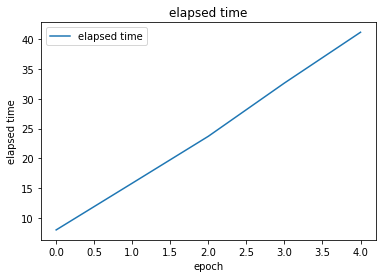

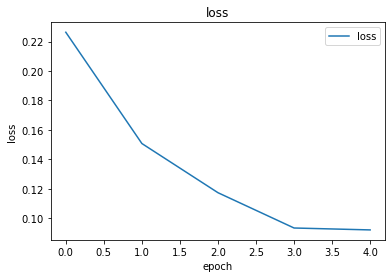

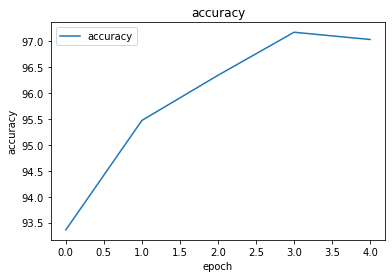

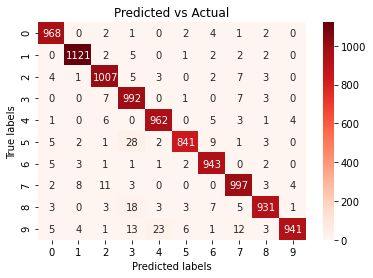

In [5]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

# Hyper params
n_epochs = 10
batch_size_train = 35
batch_size_test = 1000
learning_rate = 0.05
# Retrieve the data
train_loader, test_loader = load_dataset(batch_size_train, batch_size_test)


# References for the main idea of building the __init__/forward functions:
# Training a Classifier — PyTorch Tutorials 1.7.1 documentation. 2020.
# [ONLINE] Available at: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html.
# [Accessed 17 December 2020].
# MNIST Handwritten Digit Recognition in PyTorch - Nextjournal. 2020.
# [ONLINE] Available at: https://nextjournal.com/gkoehler/pytorch-mnist
# [Accessed 17 December 2020].
class SGD(nn.Module):
    def __init__(self):
        super(SGD, self).__init__()
        # Set up the structure of layers for the network
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        # Call the activation functions of each layer in order
        # Resizes/ Flattens the input data
        # to be usable in the first activation function
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x)


# Initialize the network and apply the SGD optimizeer
network = SGD()
optimizer = optim.SGD(network.parameters(),
                      lr=learning_rate)


def train():
    # Iterate through each mini_batch
    for batch_idx, (data, target) in enumerate(train_loader):
        # get the output from the forward pass
        output = network(data)
        # backward pass
        loss = F.nll_loss(output, target)
        optimizer.zero_grad()
        loss.backward()
        # update params
        optimizer.step()


# Lists for usage in the plots section
loss_list_on_epochs = [0]
acc_list_on_epochs = []
total_training_time = []


# Reference for the loss function used:
# torch.nn.functional — PyTorch 1.7.0 documentation.
# [ONLINE] Available at: https://pytorch.org/docs/stable/_modules/torch/nn/functional.html#cross_entropy.
# [Accessed 17 December 2020].
# Reference for accuracy:
# torch.max — PyTorch 1.7.0 documentation. 2020.
# [ONLINE] Available at: https://pytorch.org/docs/stable/generated/torch.max.html.
# [Accessed 17 December 2020].
def test(epoch):
    test_loss = 0
    correct = 0
    # iterate through each mini-batch
    for data, target in test_loader:
        # forward pass
        output = network(data)
        # sum the losses for each mini-batch
        test_loss += F.cross_entropy(output, target,
                                     size_average=False).item()
        # generate accuracy
        # We only use the second returned parameter
        _, pred = torch.max(output, 1)
        for pred, actual in zip(pred, target):
            if pred == actual:
                correct += 1
    # get mean loss from diving the sum by the number of batches
    test_loss /= len(test_loader.dataset)
    # Update params with the current loss and accuracy
    loss_list_on_epochs.append(test_loss)
    acc_list_on_epochs.append(100. * correct / len(test_loader.dataset))
    # Print out the statistics for each epoch
    print('Epoch {} finished'.format(epoch))
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} \n'.format(
        test_loss, correct, len(test_loader.dataset)))


start = time.time()
# Start iterating through the epochs and call the train and test function for each.
for epoch in range(n_epochs):
    # start the time lapse and then update the total_training_time list for each epoch
    train()
    test(epoch + 1)
    end = time.time()
    total_training_time.append(end - start)
    # Stopping criterion with respect to the loss
    if abs(loss_list_on_epochs[-1] - loss_list_on_epochs[-2]) < 0.003:
        print("Network Saturated")
        loss_list_on_epochs = loss_list_on_epochs[1:]
        break


# Reference: DeepLizard. 2020.
# CNN Confusion Matrix with PyTorch - Neural Network Programming.
# [ONLINE] Available at: https://deeplizard.com/learn/video/0LhiS6yu2qQ.
# [Accessed 17 December 2020].
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    all_labels = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds), dim=0
        )
        all_labels = torch.cat(
            (all_labels, labels), dim=0
        )
    return all_preds, all_labels


# Retrieves the outputs of the network together with their respective labels
# for use in the confusion matrix below
y_pred, y_test = get_all_preds(network, test_loader)
y_pred = np.argmax(y_pred, axis=1)

# PLOTS
# Reference: Like Geeks. 2020.
# Seaborn heatmap tutorial (Python Data Visualization) - Like Geeks.
# [ONLINE] Available at: https://likegeeks.com/seaborn-heatmap-tutorial/.
# [Accessed 17 December 2020].
plt.plot(total_training_time)
plt.title("elapsed time")
plt.ylabel('elapsed time')
plt.xlabel('epoch')
plt.legend(['elapsed time'], loc='best')
plt.show()

plt.plot(loss_list_on_epochs)
plt.title("loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='best')
plt.show()

plt.plot(acc_list_on_epochs)
plt.title("accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='best')
plt.show()

cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
ax.set_title('Predicted vs Actual')
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
sns.heatmap(cm, annot=True, ax=ax, cmap='Reds', fmt='g')
plt.xlabel('Predicted labels', axes=ax)
plt.ylabel('True labels', axes=ax)
plt.show()